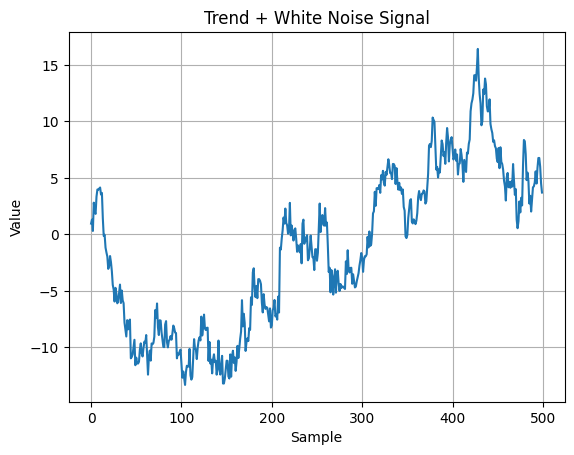

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
N = 500
trend = np.cumsum(np.random.normal(0, 1, N))  # losowy trend (random walk)
noise = np.random.normal(0, 0.5, N)
signal = trend + noise

plt.plot(signal)
plt.title("Trend + White Noise Signal")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [3]:
from statsmodels.tsa.arima.model import ARIMA

arma_model = ARIMA(signal, order=(2, 0, 2))
arma_result = arma_model.fit()

arma_forecast = arma_result.predict(start=0, end=N-1)


In [4]:
arima_model = ARIMA(signal, order=(2, 1, 2)).fit()

print("ARIMA AIC:", arima_model.aic)
print("ARIMA BIC:", arima_model.bic)


ARIMA AIC: 1582.3018940782115
ARIMA BIC: 1603.364924556969


In [5]:

print("ARMA AIC:", arma_result.aic)
print("ARMA BIC:", arma_result.bic)
print("ARIMA AIC:", arima_result.aic)
print("ARIMA BIC:", arima_result.bic)

plt.plot(signal, label='Original Signal')
plt.plot(arma_forecast, label='ARMA Forecast', linestyle='--')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle=':')
plt.legend()
plt.title("Model Comparison: ARMA vs ARIMA")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.grid(True)
plt.show()


ARMA AIC: 1588.8085623130694
ARMA BIC: 1614.0962109036025


NameError: name 'arima_result' is not defined

In [ ]:
summary_df = pd.DataFrame({
    'Model': ['ARMA(2,0,2)', 'ARIMA(2,1,2)'],
    'AIC': [arma_model.aic, arima_model.aic],
    'BIC': [arma_model.bic, arima_model.bic]
})

summary_df
